In [1]:
%matplotlib inline

In [2]:
import numpy as np
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nilearn.input_data import NiftiMasker
from scipy.stats import stats

In [3]:
def sigmoid(energy):
    X = (energy - np.nanmean(energy)) / np.nanstd(energy)
    sig = 1 / (1 + np.exp(-X))
    return sig

In [4]:
df = pd.read_csv("/home/julia/data/gradients/genes/gene_list_full.csv")
df = df[df['acronym']!="FALSE"]
df = df[np.isnan(df['entrez'])==False]
df = df.reset_index(drop=True)

In [5]:
df_energy = pd.read_csv('/home/julia/data/gradients/genes/energy.csv', index_col=0)

In [6]:
mod = []
for a in df['acronym']:
    if ('Nef' in a):
        mod.append(a)
    elif  ('Pvalb' in a):
        mod.append(a)

In [7]:
mod

['Nefm', 'Nefh', 'Pvalb', 'Nefl']

In [8]:
mask_img = nb.load('/home/julia/data/gradients/atlas/allen_api/cortex_mask_tight_200um.nii.gz')
mask = mask_img.get_data()
aff = mask_img.affine
hdr = mask_img.header

In [9]:
cortex = np.where(mask==1)[0].shape[0]

In [10]:
masker = NiftiMasker(mask_img=mask_img, standardize=False, smoothing_fwhm=0.45)

In [12]:
energy = np.zeros((cortex, len(mod)))

for a in range(len(mod)): 
    idcs = df.loc[df['acronym']==mod[a], 'id'].values
    
    for i in idcs:
        gene = np.zeros(mask.shape)
        gene += nb.load('/home/julia/data/gradients/genes/energy/%s/energy.nii.gz'%i).get_data()
        #gene = sigmoid(gene)

    gene = gene / len(idcs) 
    energy[:,a] = gene[mask==1]
    energy[:,a][energy[:,a]==-1]=np.nan
    #masker.fit_transform(nb.Nifti1Image(gene, aff, hdr))

In [25]:
mod

['Nefm', 'Nefh', 'Pvalb', 'Nefl']

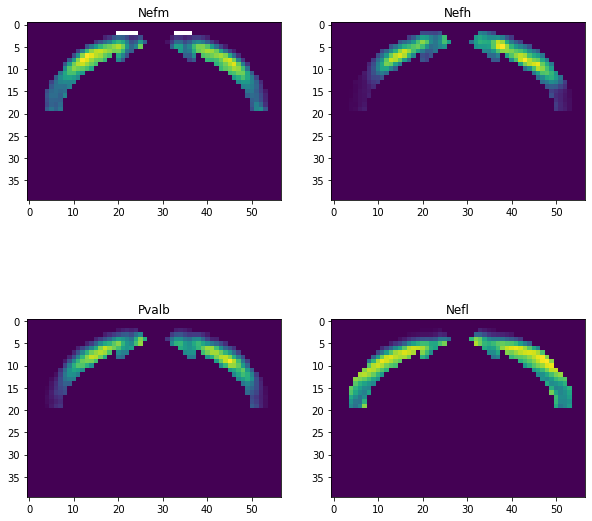

In [32]:
fig = plt.figure(figsize=(10,10))
for e in range(len(mod)):
    energy_vol = np.zeros_like(mask)
    energy_vol[mask==1] = energy[:,e]
    fig.add_subplot(2,2,e+1)
    plt.imshow(energy_vol[45,:,:])
    plt.title(mod[e])

In [34]:
df.loc[df['acronym']=='Pvalb', 'id'].values

array([868])